In [39]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

In [4]:
L = list()

## Probability Mass Function (PMF)

### Rolling a 2 Die 1000 times and recording sum obtained

In [5]:
for i in range(1000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    L.append(a+b)

In [6]:
# Check the first 5 values from the experiment

In [33]:
L[:5]
X = pd.Series(L).unique()
X # Random Variable

array([ 4, 12,  5, 11, 10,  7,  8,  6,  3,  9,  2])

In [34]:
# Now Calculaiting the Probability Distribution of all the Random Variables 
# PMF Table
s = (pd.Series(L).value_counts() / pd.Series(L).count()).sort_index()
s

2     0.026
3     0.046
4     0.077
5     0.116
6     0.148
7     0.158
8     0.148
9     0.113
10    0.087
11    0.055
12    0.026
Name: count, dtype: float64

<Axes: >

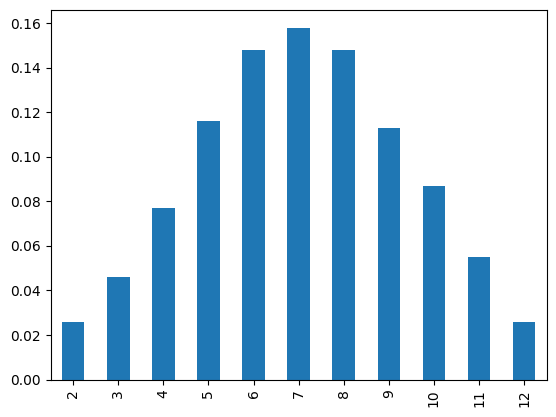

In [16]:
s.plot(kind  = "bar")

<Axes: >

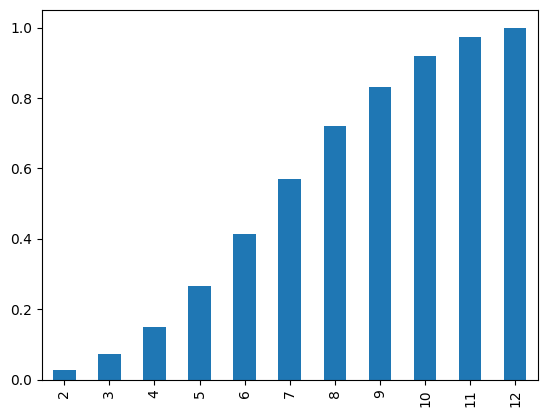

In [17]:
s.cumsum().plot(kind = "bar")

## Probability Density Function (PDF)

### Parametric Density Estimation

- In this we assume that our data follow some already know distribution and we follow that distribution parameters to define other paramerters
  

In [42]:
# We have created a sample data that we know follows normal distribution with mean 50

In [41]:
sample = normal(loc=50, scale=5,size=1000)
sample

array([53.90329976, 51.06073382, 61.26078391, 56.60365522, 50.75325079,
       43.85247411, 57.7604926 , 56.71470427, 56.07818955, 46.75534602,
       52.47171328, 47.13533113, 46.90705055, 47.81604421, 52.33161678,
       46.09929119, 47.85925303, 51.37717007, 55.53840366, 47.67933352,
       43.28604808, 50.70280612, 41.86886826, 50.84356349, 51.8793948 ,
       50.63084868, 48.73178563, 45.09436337, 44.5761463 , 42.50100208,
       38.56122174, 54.47685283, 57.21965644, 52.42013516, 48.82350921,
       44.12737206, 52.74060077, 47.75715602, 52.52941284, 48.65211668,
       53.50254081, 45.57336661, 46.24103894, 42.53813534, 50.66709293,
       52.46113107, 53.92018396, 58.55169046, 54.3977536 , 46.30399657,
       48.94887911, 48.68820338, 52.20945081, 50.01535294, 46.86940643,
       46.41638195, 45.63477288, 54.20682993, 47.38534979, 55.40522876,
       51.07303578, 41.18152013, 56.11282668, 51.36310542, 49.60356178,
       52.62673517, 55.16764194, 44.07261432, 50.15041114, 43.37

(array([ 11.,  43., 124., 205., 249., 203., 121.,  35.,   8.,   1.]),
 array([36.0037047 , 39.15999319, 42.31628169, 45.47257018, 48.62885867,
        51.78514716, 54.94143566, 58.09772415, 61.25401264, 64.41030114,
        67.56658963]),
 <BarContainer object of 10 artists>)

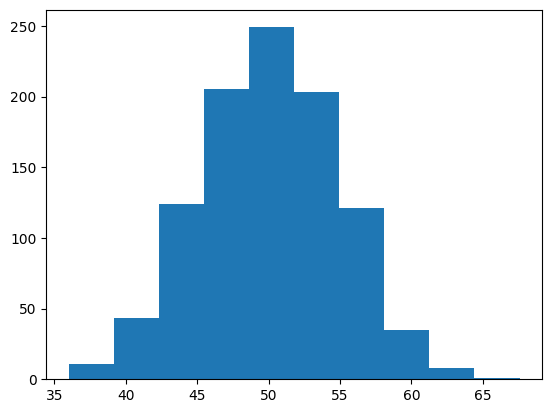

In [44]:
# plot histogram to understand the distribution of data -> Normal Distribution
plt.hist(sample,bins=10)

In [45]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [58]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [59]:
values = np.linspace(sample.min(),sample.max(),100)

In [60]:
probabilities = [dist.pdf(value) for value in values]

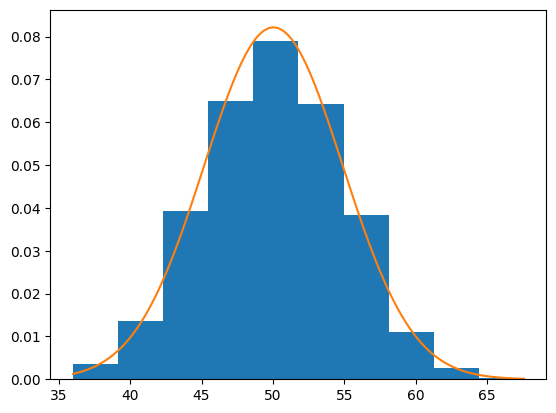

In [61]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

### Non-Parameteric Density Estimator -> KDE (Kernel Density Estimate)

In [62]:
# generate a sample -> we generate 2 normal Dist with different mean and std and stack both the data
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

(array([ 2.,  1.,  0.,  3.,  7.,  4., 10., 12., 12., 19., 25., 31., 15.,
        20., 24., 20., 25., 26., 14.,  5., 12.,  8.,  8., 19., 19., 18.,
        33., 36., 42., 54., 49., 70., 42., 59., 54., 30., 48., 36., 21.,
        19., 12., 13., 10.,  6.,  4.,  1.,  1.,  0.,  0.,  1.]),
 array([ 6.41188374,  7.44785152,  8.48381929,  9.51978707, 10.55575484,
        11.59172262, 12.6276904 , 13.66365817, 14.69962595, 15.73559373,
        16.7715615 , 17.80752928, 18.84349706, 19.87946483, 20.91543261,
        21.95140038, 22.98736816, 24.02333594, 25.05930371, 26.09527149,
        27.13123927, 28.16720704, 29.20317482, 30.23914259, 31.27511037,
        32.31107815, 33.34704592, 34.3830137 , 35.41898148, 36.45494925,
        37.49091703, 38.52688481, 39.56285258, 40.59882036, 41.63478813,
        42.67075591, 43.70672369, 44.74269146, 45.77865924, 46.81462702,
        47.85059479, 48.88656257, 49.92253035, 50.95849812, 51.9944659 ,
        53.03043367, 54.06640145, 55.10236923, 56.138337  ,

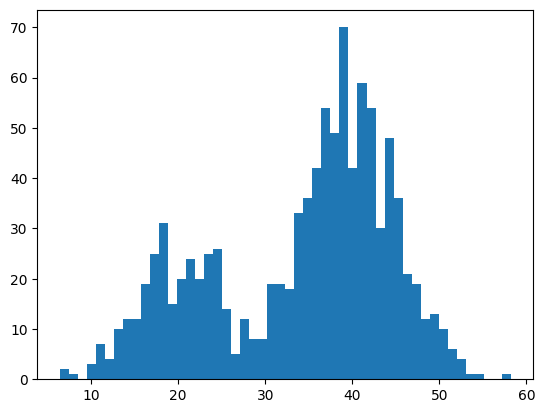

In [64]:
# plot histogram bins=50 -> Bimodal data
plt.hist(sample,bins=50)

<Axes: ylabel='Density'>

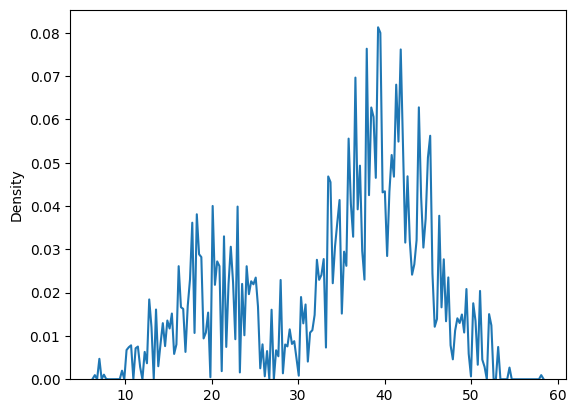

In [65]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)